<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-12-ml-auto-pca/PCA_Let's_Get_To_The_Point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=eb2d2d2301180bf7d07abbaeb938246abd1bbcc206c669fbbd3e41f4a83ef2e1
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [ ]:
from pyforest import *

#Load the dataset and conduct an exploratory analysis: number of features, correlations in the data, statistical indicators (position, dispersion)...



In [ ]:
df = pd.read_csv('/content/dftRoadSafety_Accidents_2016.zip', compression='infer', low_memory=False)

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   Location_Easting_OSGR                        136614 non-null  float64
 2   Location_Northing_OSGR                       136614 non-null  float64
 3   Longitude                                    136614 non-null  float64
 4   Latitude                                     136614 non-null  float64
 5   Police_Force                                 136621 non-null  int64  
 6   Accident_Severity                            136621 non-null  int64  
 7   Number_of_Vehicles                           136621 non-null  int64  
 8   Number_of_Casualties                         136621 non-null  int64  
 9   Date                                         136621 non-nul

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.00,-0.44,1.00,-0.45,-0.37,0.04,0.01,-0.04,0.00,-0.40,-0.04,-0.11,-0.00,-0.07,0.03,0.06,0.06,-0.03,-0.01,0.06,0.02,0.01,-0.09,-0.04,-0.01,-0.12,0.09
Location_Northing_OSGR,-0.44,1.00,-0.45,1.00,0.19,-0.04,-0.02,0.02,0.00,0.15,0.04,0.04,0.01,0.06,-0.02,-0.05,-0.04,0.02,0.01,-0.02,-0.02,0.02,0.08,0.03,0.01,0.07,-0.02
Longitude,1.00,-0.45,1.00,-0.46,-0.39,0.04,0.01,-0.03,0.00,-0.41,-0.04,-0.11,-0.00,-0.07,0.03,0.06,0.06,-0.03,-0.01,0.06,0.02,0.01,-0.09,-0.04,-0.01,-0.12,0.09
Latitude,-0.45,1.00,-0.46,1.00,0.19,-0.04,-0.02,0.02,0.00,0.15,0.04,0.04,0.01,0.06,-0.02,-0.05,-0.04,0.02,0.01,-0.02,-0.02,0.01,0.08,0.03,0.01,0.07,-0.02
Police_Force,-0.37,0.19,-0.39,0.19,1.00,-0.06,0.01,0.03,-0.00,0.98,0.04,0.02,-0.00,0.21,-0.09,-0.09,-0.11,-0.00,0.01,-0.09,0.00,-0.02,0.10,0.03,0.02,0.27,-0.05
Accident_Severity,0.04,-0.04,0.04,-0.04,-0.06,1.00,0.07,-0.07,0.01,-0.06,0.00,-0.01,-0.03,-0.09,0.04,0.06,0.06,0.01,0.01,0.02,-0.05,0.02,-0.01,-0.01,-0.01,-0.10,0.09
Number_of_Vehicles,0.01,-0.02,0.01,-0.02,0.01,0.07,1.00,0.25,-0.01,0.02,-0.15,-0.01,-0.08,0.11,0.05,0.05,0.05,0.01,-0.03,-0.06,-0.07,-0.04,-0.05,-0.01,-0.04,0.06,-0.04
Number_of_Casualties,-0.04,0.02,-0.03,0.02,0.03,-0.07,0.25,1.00,-0.00,0.03,-0.09,0.01,-0.02,0.16,-0.01,-0.04,-0.04,-0.00,-0.00,-0.03,0.03,-0.02,0.02,0.02,-0.00,0.13,-0.09
Day_of_Week,0.00,0.00,0.00,0.00,-0.00,0.01,-0.01,-0.00,1.00,-0.00,0.01,0.00,0.00,-0.02,0.00,0.01,0.01,-0.00,0.00,0.00,0.02,0.01,0.02,-0.00,-0.00,-0.01,-0.00
Local_Authority_(District),-0.40,0.15,-0.41,0.15,0.98,-0.06,0.02,0.03,-0.00,1.00,0.05,0.03,0.00,0.21,-0.10,-0.09,-0.11,0.00,0.00,-0.10,-0.00,-0.02,0.10,0.03,0.02,0.28,-0.04


In [ ]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,136614.000000,1.366140e+05,136614.000000,136614.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136584.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000,136621.000000
mean,448699.363169,2.883354e+05,-1.304881,52.482399,29.860402,2.816170,1.848179,1.327644,4.115890,342.786680,4.143638,919.997145,5.183735,37.943683,2.233002,1.696313,2.647712,321.590678,0.011192,0.824375,1.983509,1.553099,1.291697,0.085338,0.055409,1.352508,1.253965
std,95230.253169,1.570588e+05,1.398947,1.414390,25.252440,0.418152,0.710117,0.789296,1.917292,258.403794,1.456215,1753.634022,1.658072,14.041669,2.501116,2.354033,3.226569,1202.759007,0.154659,1.927500,1.676938,1.690541,0.588247,0.654925,0.557042,0.477860,0.464658
min,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,386355.750000,1.764248e+05,-2.204357,51.473779,6.000000,3.000000,1.000000,1.000000,2.000000,102.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,454126.000000,2.374855e+05,-1.201205,52.025165,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,65.000000,6.000000,30.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,527660.000000,3.897438e+05,-0.159708,53.401675,45.000000,3.000000,2.000000,1.000000,6.000000,516.000000,6.000000,640.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655256.000000,1.178623e+06,1.757858,60.490191,98.000000,3.000000,16.000000,58.000000,7.000000,941.000000,6.000000,9918.000000,9.000000,70.000000,9.000000,4.000000,6.000000,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [ ]:
df.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

In [ ]:
df.shape

(136621, 32)

#Create a slice of the dataset with only the numerical columns (you can use the select_dtypes method to help you. You will name this slice : X.




In [ ]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [ ]:
X = df.select_dtypes(['float64', 'int64'])

In [ ]:
X.sample(1)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
113035,180514.0,61117.0,-5.090477,50.408762,50,2,1,1,7,596,3,392,6,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1


In [ ]:
X = X.dropna()

In [ ]:
X.shape

(136577, 27)

#Use a scaler to scale your data. You will transform your data with this scaler, and save the scaled data to X_scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


#Instanciate a pca object if you don't yet know how many major components you want to calculate.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

#Calculate the main components of X_scaled and project the individuals with pca.fit_transform(X_scaled).

In [ ]:
main_components = pca.fit_transform(X_scaled)

In [ ]:
main_components.shape, X.shape

((136577, 27), (136577, 27))

In [ ]:
df_comp = pd.DataFrame(pca.components_ ,columns=X.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

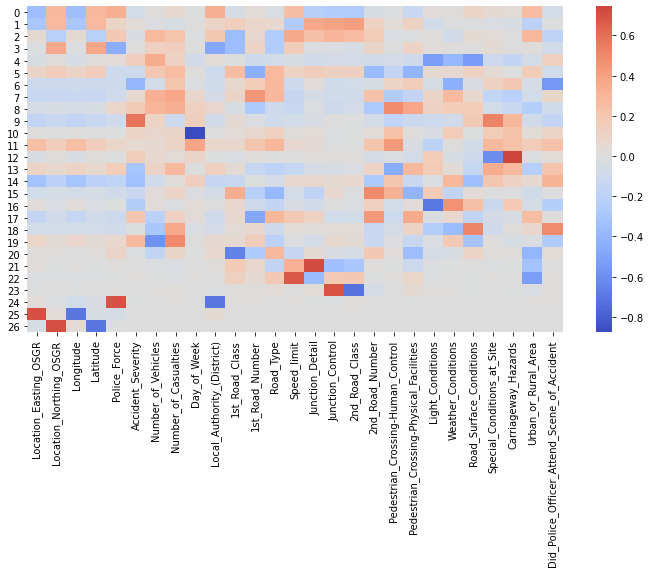

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='coolwarm', center=0)

<IPython.core.display.Javascript object>

<BarContainer object of 27 artists>

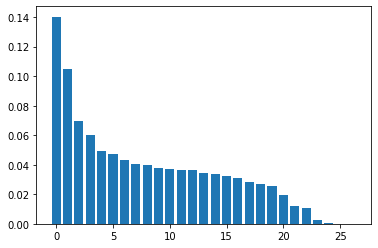

In [ ]:
plt.bar(range(len(pca.explained_variance_ratio_)), height=pca.explained_variance_ratio_)

In [ ]:
pca.explained_variance_ratio_

array([1.40280151e-01, 1.05117289e-01, 6.95704512e-02, 6.00888549e-02,
       4.92438330e-02, 4.72822671e-02, 4.33234613e-02, 4.05034893e-02,
       3.99907760e-02, 3.79357132e-02, 3.70525791e-02, 3.64308404e-02,
       3.61908219e-02, 3.42387044e-02, 3.38480671e-02, 3.22736170e-02,
       3.08266719e-02, 2.81818764e-02, 2.66925675e-02, 2.56905751e-02,
       1.96599785e-02, 1.22088896e-02, 1.03947749e-02, 2.33214863e-03,
       6.26930448e-04, 1.39694250e-05, 7.01651047e-07])

<IPython.core.display.Javascript object>

<BarContainer object of 27 artists>

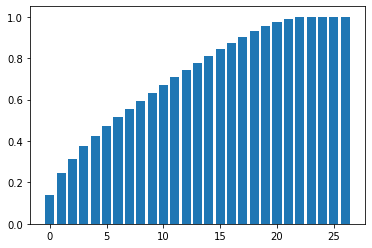

In [ ]:
plt.bar(range(len(pca.explained_variance_ratio_)), height=pca.explained_variance_ratio_.cumsum())

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.14028015, 0.24539744, 0.31496789, 0.37505675, 0.42430058,
       0.47158285, 0.51490631, 0.5554098 , 0.59540057, 0.63333629,
       0.67038887, 0.70681971, 0.74301053, 0.77724923, 0.8110973 ,
       0.84337092, 0.87419759, 0.90237946, 0.92907203, 0.95476261,
       0.97442259, 0.98663147, 0.99702625, 0.9993584 , 0.99998533,
       0.9999993 , 1.        ])

#How many principal components explain at least 70% of the variance? You can use the attribute pca.explained_variance_ratio_.What about 80%?

#ANSWER:  
12 components to reach 70%, 15 for 80%